## Machine Failure Project 

In [2]:
from warnings  import filterwarnings
filterwarnings ("ignore")

### Step 1- Data Ingestion 

In [3]:
import pandas as pd 
df= pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Target Feature- Machine Failure
##### 1. 0-Machine is Working fine
##### 2. 1-Machine is failed

### Step 2 - Perform Basic Data Quality Checks  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y (Machine Failure)

In [7]:



X=df.drop(columns=["id", "Product ID", "Machine failure"])
Y=df[["Machine failure"]]

In [8]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [9]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [10]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

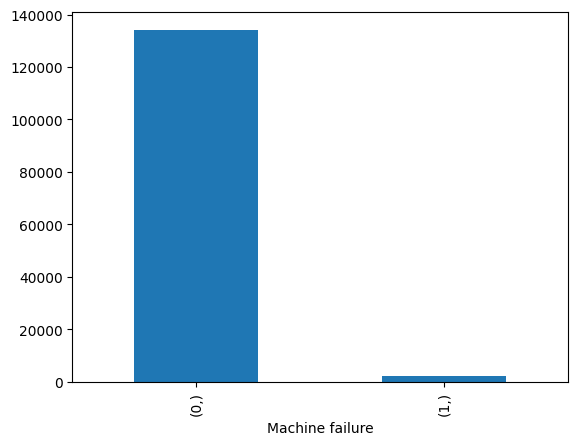

In [11]:
Y.value_counts().plot(kind="bar")

### Step 4- Apply Preprocessing on x

In [12]:
X.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [13]:
cat= list(X.columns[X.dtypes==object])
con= list(X.columns[X.dtypes !="object"])

In [14]:
cat

['Type']

In [15]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [18]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    
)

In [19]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat", cat_pipe, cat)

    ]
).set_output(transform="pandas")

In [20]:
x_pre = pre.fit_transform(X)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Step 5- Apply Train Test Split 

In [21]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre,Y, test_size=0.2 , random_state=42)


In [22]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [23]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [24]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [25]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [26]:
xtrain.shape

(109143, 13)

In [27]:
xtest.shape

(27286, 13)

### Step 6- Algorithm Evaluation

##### SVM,KNN is skipped because it is suitable for smaller datasets upto 1000 rows

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb

In [30]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [31]:
models[0].__class__.__name__

'LogisticRegression'

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [33]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):

    # Fit the model 
    model.fit(xtrain, ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculated f1_macro for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # 5 fold crossvalidaton on train data
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
    f1_cv = scores.mean()

    # Create a dictionary for final results
    res = {
        "model_name": model.__class__.__name__,
        "model": model,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "f1_cv": f1_cv
    }

    return res






In [34]:
def algo_evaluation(models: list, xtrain, ytrain, xtest, ytest):

    # Intialize blank list for results
    results = []

    # Apply for loop on models
    for model in models:
        res = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(res)
        results.append(res)

    # Save the results in dataframe
    res_df = pd.DataFrame(results)

    # Sort the results
    sort_df = res_df.sort_values(by="f1_cv", ascending=False).reset_index(drop=True)

    # Get the best model
    best_model = sort_df.loc[0, "model"]
    
    return sort_df.round(4), best_model


In [35]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [36]:
df_res,best_model= algo_evaluation(models, xtrain.values, ytrain.values, xtest.values, ytest.values)


{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': np.float64(0.9302961192536252), 'f1_test': np.float64(0.9314565053016582), 'f1_cv': np.float64(0.9302929726945202)}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': np.float64(0.9974641142940155), 'f1_test': np.float64(0.877823310007755), 'f1_cv': np.float64(0.8718055035600527)}
{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': np.float64(0.9973188191904883), 'f1_test': np.float64(0.9297653640232463), 'f1_cv': np.float64(0.9275077243376163)}
{'model_name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': np.float64(0.9357206926028346), 'f1_test': np.float64(0.9308524696197871), 'f1_cv': np.float64(0.9286306701002409)}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

In [37]:

df_res

,model_name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(),0.9303,0.9315,0.9303
1,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.9357,0.9309,0.9286
2,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9471,0.9305,0.9279
3,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9973,0.9298,0.9275
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.9975,0.8778,0.8718


In [38]:

best_model

LogisticRegression()

### Evaluate the best model

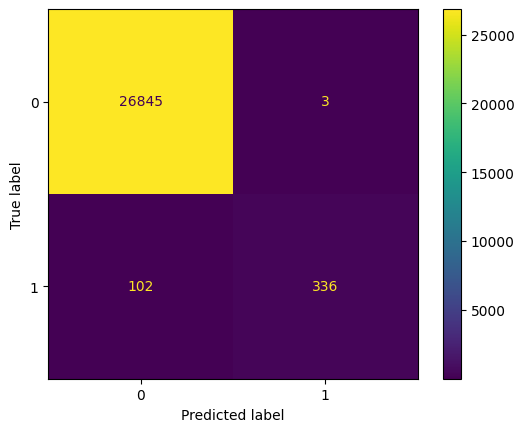

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)


In [40]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [41]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



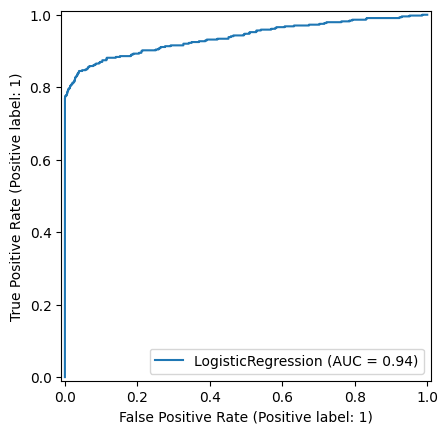

In [43]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

In [44]:
roc_scores = cross_val_score(best_model, xtrain , ytrain,cv=5, scoring="roc_auc")
roc_scores

array([0.941253  , 0.93107413, 0.95421902, 0.9278796 , 0.92415604])

In [45]:
roc_scores.mean()

np.float64(0.935716357155114)

### from above metrics i can say  that model is good as f1_macro = 0.93 and roc_auc score >0.8

### Step 8 - Out of sample Prediction 

In [46]:
xnew =pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [47]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [48]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [49]:
preds= best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [50]:
best_model.classes_

array([0, 1])

In [51]:
probs = best_model.predict_proba(xnew_pre)[:,1]
probs[0:5]

array([0.00210154, 0.00103944, 0.00256331, 0.00277255, 0.00342616])

In [52]:
res = xnew[["id"]]
res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [61]:
res["Failure_Pred "]=preds
res["Failure_prob"] = probs

In [58]:
res

,id,Machine_failure_Prediction,prob,failure_Pred,failure_prob
0,136429,0,0.0021,0,0.002102
1,136430,0,0.0010,0,0.001039
2,136431,0,0.0026,0,0.002563
3,136432,0,0.0028,0,0.002773
4,136433,0,0.0034,0,0.003426
...,...,...,...,...,...
90949,227378,0,0.0022,0,0.002211
90950,227379,0,0.0005,0,0.000497
90951,227380,0,0.0030,0,0.002975
90952,227381,0,0.0023,0,0.002303


In [55]:
res

,id,Machine_failure_Prediction,prob
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0026
3,136432,0,0.0028
4,136433,0,0.0034
...,...,...,...
90949,227378,0,0.0022
90950,227379,0,0.0005
90951,227380,0,0.0030
90952,227381,0,0.0023


In [62]:
res["failure_Pred "].value_counts()

failure_Pred 
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Failure_Pred '>

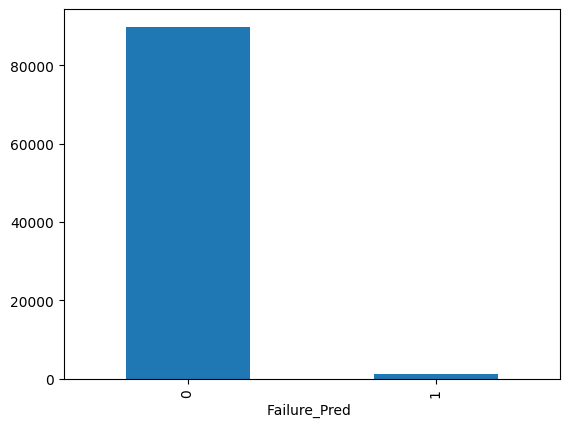

In [66]:
res["Failure_Pred "].value_counts().plot(kind="bar")

In [67]:
res[res["Failure_Pred "]==1]

,id,Machine_failure_Prediction,prob,failure_Pred,failure_prob,Failure_Pred,Failure_prob
17,136446,1,0.9926,1,0.992574,1,0.992574
209,136638,1,0.9963,1,0.996292,1,0.996292
223,136652,1,0.9875,1,0.987550,1,0.987550
397,136826,1,0.9970,1,0.996967,1,0.996967
405,136834,1,0.9989,1,0.998944,1,0.998944
...,...,...,...,...,...,...,...
90503,226932,1,0.9894,1,0.989414,1,0.989414
90665,227094,1,0.9998,1,0.999825,1,0.999825
90679,227108,1,0.7430,1,0.742960,1,0.742960
90784,227213,1,0.9839,1,0.983857,1,0.983857


In [68]:
res = res.round(4)

In [69]:
res.to_csv("logisticResults.csv", index=False)

### save the model object and the preprocessor 

In [70]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [71]:
best_model

LogisticRegression()

In [72]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [73]:
joblib.dump(best_model,"machineModel.joblib" )

['machineModel.joblib']

### Load the object

In [74]:
p= joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [77]:
m= joblib.load("machineModel.joblib")
m 

LogisticRegression()